In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import *
import os
from tqdm import tqdm
import pdb

In [2]:
# setting paths
data_dir = os.path.abspath('./_data')
train_data_fp = os.path.join(data_dir, 'data.csv')
test_data_fp = os.path.join(data_dir, 'test.csv')
os.listdir(data_dir)

['data.csv', 'test.csv']

In [3]:
# loading data-set
train_data = pd.read_csv(train_data_fp)
test_data = pd.read_csv(test_data_fp)
n_train = len(train_data)
n_test = len(test_data)

In [4]:
print(f'Training data-set consists of {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'Test data-set consists of {test_data.shape[0]} rows and {test_data.shape[1]} columns')

Training data-set consists of 616656 rows and 20 columns
Test data-set consists of 154165 rows and 19 columns


In [5]:
# store target value and drop it from 'train_data'
market_share = train_data.loc[:, 'Market Share_total'].values
train_data.drop(columns=['Market Share_total'], inplace=True)
train_data.head(1)

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,20.4


### Cancatenate train and test sets for held in common data preprocessings

In [6]:
data = pd.concat(objs=[train_data, test_data], axis=0, ignore_index=True)
# make sure length of joint dataframe is equal with sum of train and test length
len(data) == (n_train + n_test)

True

In [7]:
col_names = ['unnamed', 'episode', 'station', 'ch_type', 'season', 'year', 'date', 'weekday',
             'start_time', 'end_time', 'length', 'show_name', 'episode_name', 'genre', 'first_or_rerun', 
             'episodes_in_season', 'is_movie', 'overlaped_with_game', 'temperature']

In [8]:
# renaming columns for easier access
data.columns = col_names

## drop unnecessary column(s)
# 'episode' and 'show_name' columns are identical
# 'season', 'year' and 'weekday' will be infered from 'date' later and automatically add to dataframe
data.drop(columns=['unnamed', 'episode', 'season', 'year', 'weekday'], inplace=True, errors='ignore')

### Infering information from `date` column

In [9]:
data.head(1)

,station,ch_type,date,start_time,end_time,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,temperature
0,V Total,General Channel,2016-08-29,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,20.4


In [10]:
# convert 'date' type from object to datetime
data['date'] = data['date'].astype('datetime64[D]')
# helper function from fastai library to extract usefull info from 'date'
add_datepart(data, 'date')

,station,ch_type,start_time,end_time,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,V Total,General Channel,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,...,29,0,242,False,False,False,False,False,False,1472428800
1,V Total,General Channel,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,...,29,0,242,False,False,False,False,False,False,1472428800
2,V Total,General Channel,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,...,29,0,242,False,False,False,False,False,False,1472428800
3,V Total,General Channel,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,...,29,0,242,False,False,False,False,False,False,1472428800
4,V Total,General Channel,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,...,29,0,242,False,False,False,False,False,False,1472428800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770816,ARTV+,Specialty Channel,2019-08-25 18:00:00,2019-08-25 19:00:00,4,Pour emporter,NaN,General Entertainment and Human Interest,No,Yes,...,25,6,237,False,False,False,False,False,False,1566691200
770817,ARTV+,Specialty Channel,2019-08-25 19:00:00,2019-08-25 20:00:00,4,Amour du country,NaN,Music and Dance other than Music Video Program...,No,Yes,...,25,6,237,False,False,False,False,False,False,1566691200
770818,ARTV+,Specialty Channel,2019-08-25 20:00:00,2019-08-25 21:30:00,6,Notre cinéma,"All you can eat Bouddha, le meilleur des séjours",Theatre Feature Films Aired on TV,No,Yes,...,25,6,237,False,False,False,False,False,False,1566691200
770819,ARTV+,Specialty Channel,2019-08-25 21:30:00,2019-08-26 00:00:00,10,Cinéma du vendredi (R),Selma,Theatre Feature Films Aired on TV,No,Yes,...,25,6,237,False,False,False,False,False,False,1566691200


In [11]:
data.head(3).T

,0,1,2
station,V Total,V Total,V Total
ch_type,General Channel,General Channel,General Channel
start_time,2016-08-29 06:00:00,2016-08-29 08:00:00,2016-08-29 08:30:00
end_time,2016-08-29 08:00:00,2016-08-29 08:30:00,2016-08-29 09:00:00
length,8,2,2
show_name,Vidéoclips V,Apollo dans l'frigo,Infopublicité
episode_name,NaN,NaN,NaN
genre,Music Video Clips,Informal Education and Recreation and Leisure,"Infomercials, Promotional and Corporate Videos"
first_or_rerun,No,No,No
episodes_in_season,Yes,Yes,Yes


### Handeling missing values

In [12]:
data.isnull().sum()

station                     0
ch_type                     0
start_time                 65
end_time                   65
length                      0
show_name                   0
episode_name           253198
genre                       0
first_or_rerun              0
episodes_in_season          0
is_movie                    0
overlaped_with_game         0
temperature            106573
Year                        0
Month                       0
Week                        0
Day                         0
Dayofweek                   0
Dayofyear                   0
Is_month_end                0
Is_month_start              0
Is_quarter_end              0
Is_quarter_start            0
Is_year_end                 0
Is_year_start               0
Elapsed                     0
dtype: int64

#### 1. `start_time` and `end_time` missing values

In [13]:
# find out if both 'start_time' and 'end_time' are missing simultaneously
len(data[(data['start_time'].isnull()) & (data['end_time'].isnull())]) == 65

True

In [14]:
def get_running_time(row):
    r"""Helper function to calculate length of a show.
    
    Parameters:
    -------------
        row: a pandas.DataFrame row
        
    Returns:
    -------------
        float: show length
    """
    start = pd.to_datetime(row['start_time'])
    end = pd.to_datetime(row['end_time'])

    return (end - start).seconds / 60

In [15]:
### NOTE: RUNNING THIS CELL TAKES SOME TIMES TO COMPLETE ###

# apply the helper function and store the values in a new column
data['running_time'] = data.apply(lambda x: get_running_time(x), axis=1)

Wall time: 0 ns


In [16]:
# fill running_time's missing values with the median
data['running_time'].fillna(value=data['running_time'].median(), inplace=True)
# drop 'start_time' and 'end_time' columns
data.drop(columns=['start_time', 'end_time'], inplace=True, errors='ignore')
data.head(1)

,station,ch_type,length,show_name,episode_name,genre,first_or_rerun,episodes_in_season,is_movie,overlaped_with_game,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,running_time
0,V Total,General Channel,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,...,0,242,False,False,False,False,False,False,1472428800,120.0


#### 2. `episode_name` missing values

In [17]:
# number of unique items in 'episode_name' column
len(data['episode_name'].unique())

101354

**Since there are 100k+ unique names in `episode_name` column, it's not much a help to our model. So, we just record if a row has `episode_name` or not and drop that column.**

In [18]:
# boolean indicator to know if a row had 'episode_name' or not
data['episode_name_na'] = data['episode_name'].apply(lambda x: 1 if pd.isnull(x) else 0)
# drop 'episode_name' column
data.drop(columns=['episode_name'], inplace=True, errors='ignore')

#### 3. `temperature` missing values

In [19]:
data.isnull().sum()

station                     0
ch_type                     0
length                      0
show_name                   0
genre                       0
first_or_rerun              0
episodes_in_season          0
is_movie                    0
overlaped_with_game         0
temperature            106573
Year                        0
Month                       0
Week                        0
Day                         0
Dayofweek                   0
Dayofyear                   0
Is_month_end                0
Is_month_start              0
Is_quarter_end              0
Is_quarter_start            0
Is_year_end                 0
Is_year_start               0
Elapsed                     0
running_time                0
episode_name_na             0
dtype: int64

In [20]:
def impute_missing_by_closest_date(dataframe, feature, dayofyear):
    r"""Helper function to replace a missing value by median of the same day of the year from other instances.
    
    Parameters:
    --------------
        df (pd.DataFrame)
        feature (string): name of the column with missing value
        dayofyear (string): name of the column that keeps the nth day of the year
        
    Returns:
    --------------
        df (pd.DataFrame): modified dataframe with no missing value in feature column    
    """
    # pdb.set_trace()
    df = dataframe.copy()
    indices = np.array(df[feature].isnull())
    indices = np.where(indices==True)[0]
    
    for idx in tqdm(indices):
        row_dayofyear = df.loc[idx, dayofyear]
        #subset = df[(df[dayofyear] > row_dayofyear - 4) & (df[dayofyear] < row_dayofyear + 4)]
        subset = df[df[dayofyear] == row_dayofyear]
        value = subset[feature].median()
        
        df.loc[idx, feature] = value
        
    return df

In [21]:
# boolean indicator to know if the row had 'temperature' or not
data['temperature_na'] = data['temperature'].apply(lambda x: 1 if pd.isnull(x) else 0)
# fill temperature feature missing values with the mean
# data['temperature'].fillna(data['temperature'].mean(), inplace=True)

In [22]:
### NOTE: RUNNING THIS CELL TAKES SOME TIMES TO COMPLETE ###

tdata = impute_missing_by_closest_date(data, feature='temperature', dayofyear='Dayofyear')

  0%|                                                                             | 0/106573 [00:00<?, ?it/s]

Wall time: 0 ns


100%|████████████████████████████████████████████████████████████████| 106573/106573 [19:47<00:00, 89.78it/s]


In [23]:
tdata.isnull().sum()

station                0
ch_type                0
length                 0
show_name              0
genre                  0
first_or_rerun         0
episodes_in_season     0
is_movie               0
overlaped_with_game    0
temperature            0
Year                   0
Month                  0
Week                   0
Day                    0
Dayofweek              0
Dayofyear              0
Is_month_end           0
Is_month_start         0
Is_quarter_end         0
Is_quarter_start       0
Is_year_end            0
Is_year_start          0
Elapsed                0
running_time           0
episode_name_na        0
temperature_na         0
dtype: int64

### Save DataFrame to disk

In [26]:
# save imputed dataframe as csv to disk
tdata.to_csv(data_dir + '/data_no_missing.csv', index=False)

In [152]:
def transform(arr, gamma=1e-3):
    arr = np.asarray(arr)
    arr = arr + gamma
    return np.log(arr)

In [153]:
def reverse_transform(arr, gamma=1e-3):
    arr = np.asarray(arr)
    arr = np.exp(arr)
    return arr - gamma

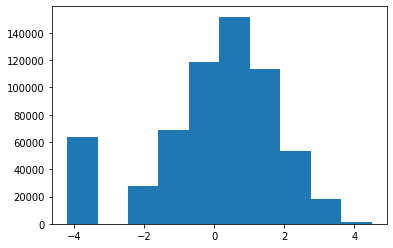

In [169]:
l = transform(market_share, gamma=1.5e-2)

plt.hist(l)
plt.show()

In [160]:
e = reverse_transform(l)

In [161]:
np.allclose(market_share, e)

True